In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 8,6

In [3]:
# read in the 2016-2017 data set
df = pd.read_csv('/Users/oeyvind/Documents/Studier/CS109A/Project/LendingClubFiles/data_cleaned_2016_2017.csv', low_memory = False)

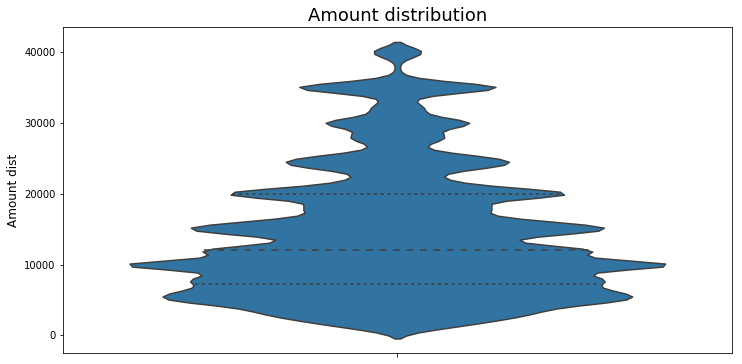

In [4]:
plt.figure(figsize=(12,6))

g = sns.violinplot(y="loan_amnt", data=df, 
               inner="quartile")
g.set_xlabel("", fontsize=12)
g.set_ylabel("Amount dist", fontsize=12)
g.set_title("Amount distribution", fontsize=18)

plt.show()

## Seems like the interest rate is a very good predictor of which loans will default

In [5]:
df['int_round'] = df['int_rate'].round(0).astype(int)
df_y = df[['int_round','loan_status']]
crosst_y = pd.crosstab(df['int_round'], df['loan_status'])
crosst_y['Fully Paid %'] = crosst_y['Fully Paid'] / (crosst_y['Fully Paid'] + crosst_y['Charged Off'])*100
crosst_y

loan_status,Charged Off,Fully Paid,Fully Paid %
int_round,,,
5,504,11810,95.907098
6,276,3428,92.548596
7,1538,18841,92.453015
8,2702,20635,88.421819
9,2412,15833,86.779940
10,3049,18015,85.525066
11,8184,34952,81.027448
12,2559,9219,78.273051
13,7896,25552,76.393207


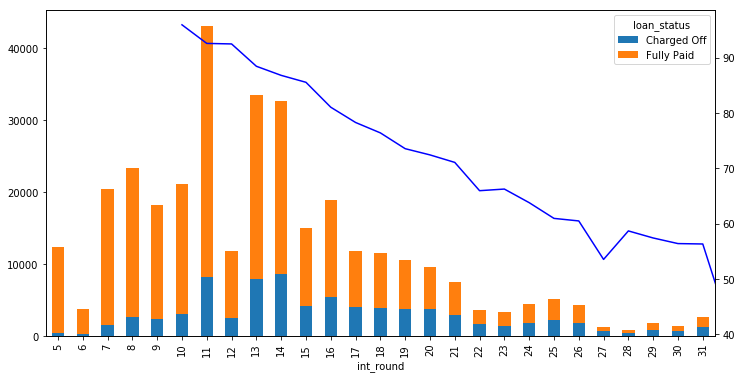

In [6]:
crosst_y[['Charged Off','Fully Paid']].plot(kind='bar', stacked=True,figsize=(12,6))
ax2 = plt.twinx()
sns.lineplot(data=crosst_y['Fully Paid %'], color="b", ax=ax2)

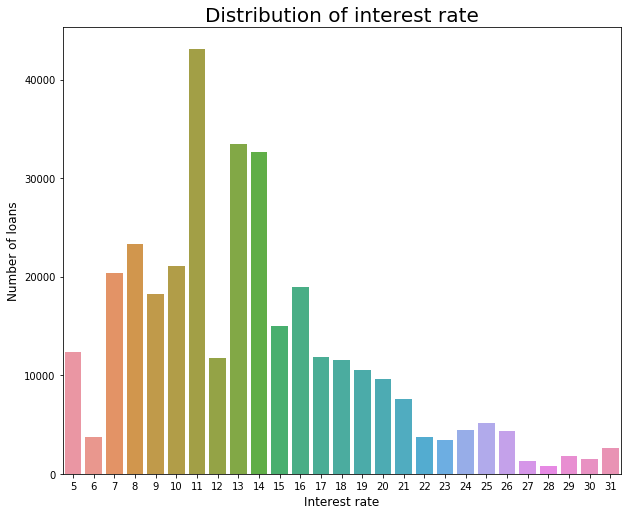

In [17]:
df['int_round'] = df['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

g1 = sns.countplot(x="int_round",data=df)
g1.set_xlabel("Interest rate", fontsize=12)
g1.set_ylabel("Number of loans", fontsize=12)
g1.set_title("Distribution of interest rate", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

## Also the type of loan is a decent predictor
## Remember the baseline is 76 %

In [95]:
cm = sns.light_palette("green", as_cmap=True)
crosst = pd.crosstab(df['purpose'], df['loan_status'])
crosst['Fully Paid %'] = crosst['Fully Paid'] / (crosst['Fully Paid'] + crosst['Charged Off'])*100
crosst.style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid,Fully Paid %
purpose,,,
car,662,3228,82.982
credit_card,13753,50928,78.7372
debt_consolidation,47602,144826,75.2624
home_improvement,5138,20460,79.9281
house,470,1575,77.0171
major_purchase,1856,6441,77.6305
medical,1211,3419,73.8445
moving,766,2036,72.6624
other,5509,17519,76.0769


## Also based on the grade, the percentage of loans defaulting varies greatly

In [165]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
cross_u = pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], normalize='columns').style.background_gradient(cmap = cm)
cross_u

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,0.0744333,0.162135,0.256087,0.348043,0.426082,0.506566,0.523458
Fully Paid,0.925567,0.837865,0.743913,0.651957,0.573918,0.493434,0.476542


##Different rates for differet states?

In [189]:
df['int_rate'] = df['int_rate'].astype('float')
by_interest_rate = df.groupby(['addr_state'], as_index=False).int_rate.mean()
by_interest_rate


,addr_state,int_rate
0,AK,13.531188
1,AL,14.128854
2,AR,13.921885
3,AZ,13.456408
4,CA,13.535482
5,CO,13.349749
6,CT,13.676320
7,DC,12.733669
8,DE,13.711380
9,FL,13.819271


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



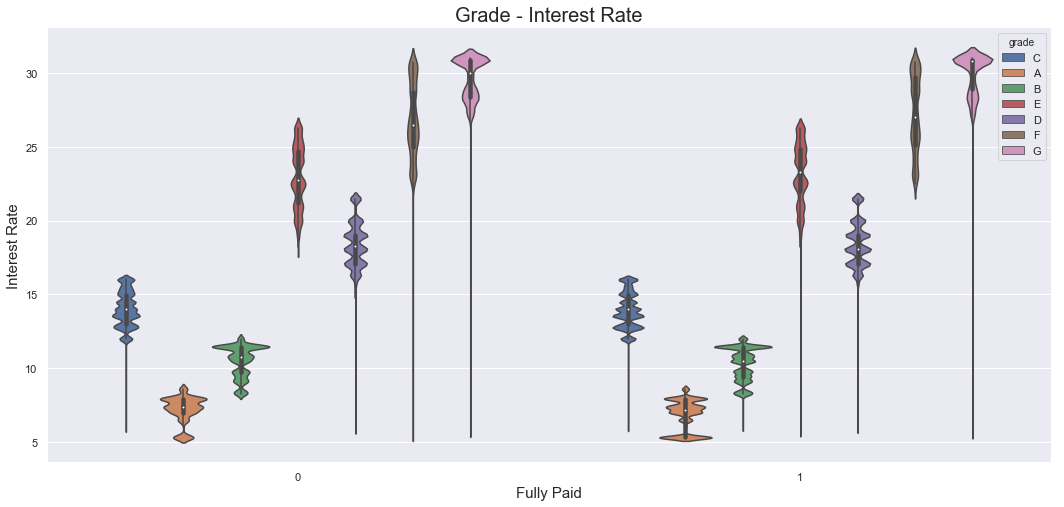

In [206]:
target_list = [1 if i=='Fully Paid' else 0 for i in df['loan_status']]

df['Fully Paid'] = target_list
df['Fully Paid'].value_counts()

fig = plt.figure(figsize=(18,8))
sns.violinplot(x="Fully Paid",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("Fully Paid", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);


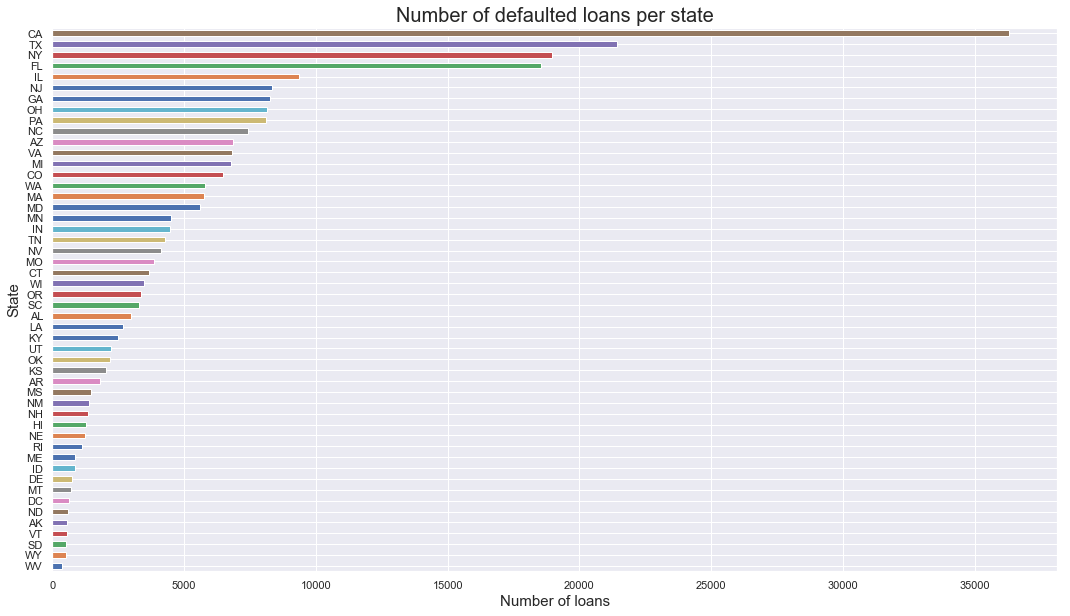

In [207]:
fig = plt.figure(figsize=(18,10))
df[df['Fully Paid']==1].groupby('addr_state')['Fully Paid'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

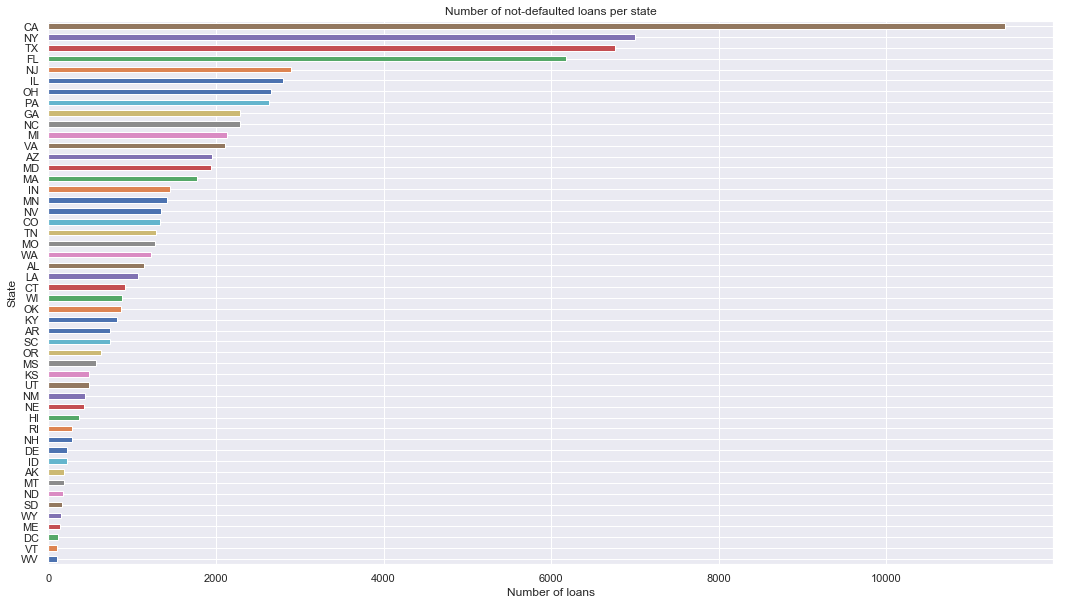

In [208]:
fig = plt.figure(figsize=(18,10))
df[df['Fully Paid']==0].groupby('addr_state')['Fully Paid'].count().sort_values().plot(kind='barh')
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of not-defaulted loans per state');